### Importação dos dados




--- Iniciando análise de desempenho---

 --------- Análise detalhada: loja1 ----------
Faturamento total: R$ 1,534,509.12

[Requisito] Vendas por categoria (As mais populares):


,Produto
Categoria do Produto,
moveis,465
eletronicos,448
brinquedos,324
eletrodomesticos,312
esporte e lazer,284
instrumentos musicais,182
livros,173
utilidades domesticas,171


Média de Avaliação: 3.98
Produto Mais Vendido: Micro-ondas (60 vendas)
Produto Menos Vendido: Headset (33 vendas)
Custo Médio de Frete: R$ 34.69

 --------- Análise detalhada: loja2 ----------
Faturamento total: R$ 1,488,459.06

[Requisito] Vendas por categoria (As mais populares):


,Produto
Categoria do Produto,
moveis,442
eletronicos,422
brinquedos,313
eletrodomesticos,305
esporte e lazer,275
instrumentos musicais,224
livros,197
utilidades domesticas,181


Média de Avaliação: 4.04
Produto Mais Vendido: Iniciando em programação (65 vendas)
Produto Menos Vendido: Jogo de tabuleiro (32 vendas)
Custo Médio de Frete: R$ 33.62

 --------- Análise detalhada: loja3 ----------
Faturamento total: R$ 1,464,025.03

[Requisito] Vendas por categoria (As mais populares):


,Produto
Categoria do Produto,
moveis,499
eletronicos,451
brinquedos,315
eletrodomesticos,278
esporte e lazer,277
livros,185
instrumentos musicais,177
utilidades domesticas,177


Média de Avaliação: 4.05
Produto Mais Vendido: Kit banquetas (57 vendas)
Produto Menos Vendido: Blocos de montar (35 vendas)
Custo Médio de Frete: R$ 33.07

 --------- Análise detalhada: loja4 ----------
Faturamento total: R$ 1,384,497.58

[Requisito] Vendas por categoria (As mais populares):


,Produto
Categoria do Produto,
moveis,480
eletronicos,451
brinquedos,338
esporte e lazer,277
eletrodomesticos,254
utilidades domesticas,201
livros,187
instrumentos musicais,170


Média de Avaliação: 4.00
Produto Mais Vendido: Cama box (62 vendas)
Produto Menos Vendido: Guitarra (33 vendas)
Custo Médio de Frete: R$ 31.28

Tabela de resumo consolidada ( Pronta para Gráficos): 


,Faturamento,Categoria_mais_pop,Avaliacao_media,Mais_vendido,Menos_vendido,Frete_medio,Rank_venda
loja1,1534509.12,moveis,3.98,Micro-ondas,Headset,34.691805,1.0
loja2,1488459.06,moveis,4.04,Iniciando em programação,Jogo de tabuleiro,33.621941,2.0
loja3,1464025.03,moveis,4.05,Kit banquetas,Blocos de montar,33.074464,3.0
loja4,1384497.58,moveis,4.00,Cama box,Guitarra,31.278997,4.0



--- Gráficos ---


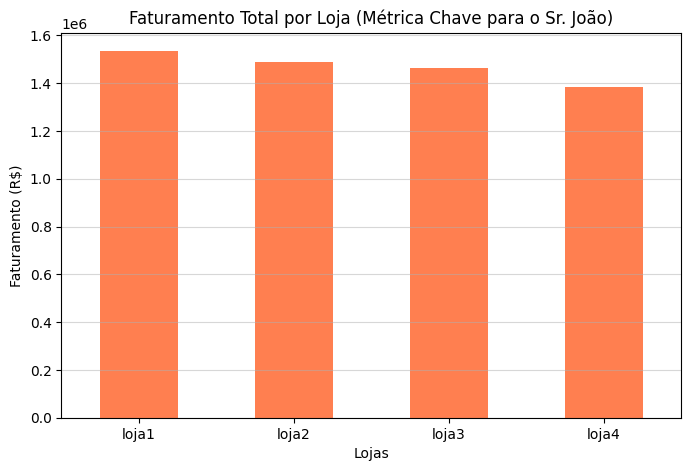

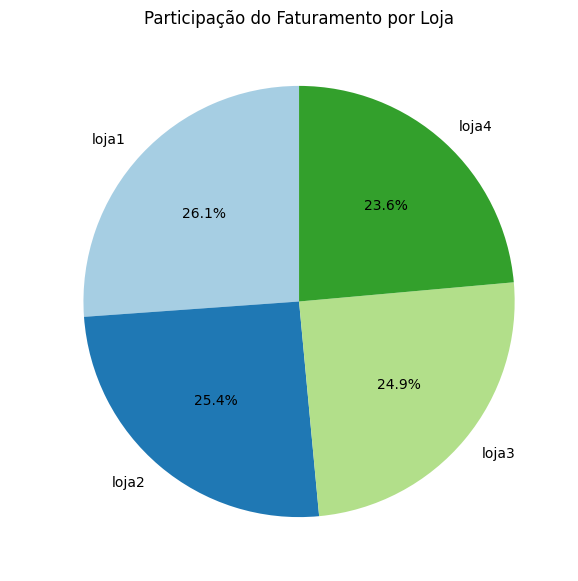

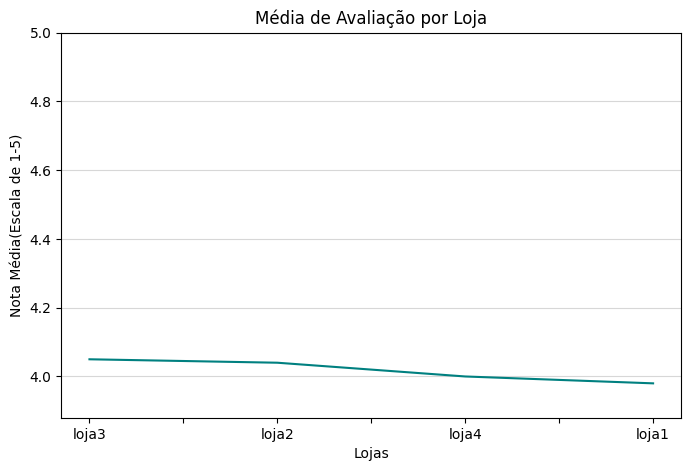


---Visualização Final---
Tabela final formatada para relatório do Sr.João:


,Faturamento,Categoria_mais_pop,Avaliacao_media,Mais_vendido,Menos_vendido,Frete_medio,Rank_venda
loja1,"R$1,534,509.12",moveis,3.98,Micro-ondas,Headset,R$34.69,1.0
loja2,"R$1,488,459.06",moveis,4.04,Iniciando em programação,Jogo de tabuleiro,R$33.62,2.0
loja3,"R$1,464,025.03",moveis,4.05,Kit banquetas,Blocos de montar,R$33.07,3.0
loja4,"R$1,384,497.58",moveis,4.00,Cama box,Guitarra,R$31.28,4.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

nomes_lojas = ["loja1", "loja2", "loja3", "loja4"]
urls = [url1, url2, url3, url4]

lojas = {nomes_lojas[i]: pd.read_csv(urls[i]) for i in range (len(nomes_lojas))}

def preparar_dados(df):
    df["Preço"] =pd.to_numeric(df["Preço"], errors = "coerce").fillna(0)
    df["Avaliação da compra"] = pd.to_numeric(df["Avaliação da compra"], errors="coerce")
    df["Frete"] = pd.to_numeric(df["Frete"], errors="coerce").fillna(0)
    return df

for nome, df in lojas.items():
  lojas[nome] = preparar_dados(df)

print("\n--- Iniciando análise de desempenho---")

metricas_resumo = {}

for nome_loja, dados_loja in lojas.items():
  print(f"\n --------- Análise detalhada: {nome_loja} ----------")

  faturamento = dados_loja["Preço"].sum()
  print(f"Faturamento total: R$ {faturamento:,.2f}")

  categoria = dados_loja.groupby("Categoria do Produto")["Produto"].count().sort_values(ascending=False)
  print("\n[Requisito] Vendas por categoria (As mais populares):") 
  display(categoria)
  top_categoria_nome = categoria.index[0]

  avaliacao_media = dados_loja["Avaliação da compra"].mean()
  print(f"Média de Avaliação: {avaliacao_media:.2f}")

  contagem_produtos = dados_loja["Produto"].value_counts()
  produto_mais_vendido = contagem_produtos.idxmax()
  produto_menos_vendido = contagem_produtos.idxmin()
  print(f"Produto Mais Vendido: {produto_mais_vendido} ({contagem_produtos.iloc[0]} vendas)")
  print(f"Produto Menos Vendido: {produto_menos_vendido} ({contagem_produtos.iloc[-1]} vendas)")

  frete_medio = dados_loja["Frete"].mean()
  print(f"Custo Médio de Frete: R$ {frete_medio:.2f}")

  metricas_resumo[nome_loja] = {
      "Faturamento": faturamento,
      "Categoria_mais_pop": top_categoria_nome,
      "Avaliacao_media": avaliacao_media,
      "Mais_vendido": produto_mais_vendido,
      "Menos_vendido": produto_menos_vendido,
      "Frete_medio": frete_medio
  }

df_resumo = pd.DataFrame.from_dict(metricas_resumo, orient="index")
df_resumo["Rank_venda"] = df_resumo["Faturamento"].rank(ascending=False)
df_resumo["Avaliacao_media"] = df_resumo["Avaliacao_media"].round(2)

print("\nTabela de resumo consolidada ( Pronta para Gráficos): ")
display(df_resumo.sort_values(by="Rank_venda", ascending=True))

print("\n--- Gráficos ---")

# Gráfico 1: Barras( Faturamento)
plt.figure(figsize=(8, 5))
df_resumo["Faturamento"].sort_values(ascending=False).plot(kind="bar", color="coral")
plt.title("Faturamento Total por Loja (Métrica Chave para o Sr. João)")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Lojas")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.5)
plt.show()

#Gráfico 2: Pizza (Participação do Faturamento)
plt.figure(figsize=(7,7))
df_resumo["Faturamento"].plot(kind="pie",
                              autopct="%1.1f%%",
                              startangle=90,
                              colors=plt.cm.Paired.colors,
                              ylabel=" ")
plt.title("Participação do Faturamento por Loja")
plt.show()

# Gráfico 3: Linhas (Média de Avaliação)
plt.figure(figsize=(8,5))
df_resumo["Avaliacao_media"].sort_values(ascending=False).plot(kind="line", color="teal")
plt.title("Média de Avaliação por Loja")
plt.ylabel("Nota Média(Escala de 1-5)")
plt.xlabel("Lojas")
plt.ylim(df_resumo["Avaliacao_media"].min() - 0.1, 5.0)
plt.grid(axis="y", alpha=0.5)
plt.show()

#--- Tabela final---
print("\n---Visualização Final---")
df_resumo["Faturamento"] = df_resumo["Faturamento"].map("R${:,.2f}".format)
df_resumo["Frete_medio"] = df_resumo["Frete_medio"].map("R${:,.2f}".format)

print("Tabela final formatada para relatório do Sr.João:")
display(df_resumo.sort_values(by="Rank_venda",ascending=True)) 

**negrito**# Relatório de Análise de lojas

### Objetivo
Este relatório tem como finalidade auxiliar o **Sr.João** a decidir **qual das quatro lojas deve vender**, analisando indicadores de desempenho como faturamento, avaliação média dos clientes, categorias mais vendidas e custo médio de frete.

A análise foi desenvolvida em **Python**, utilizando **Pandas** para manipulação dos dados e **Matplotlib** para criação dos gráficos, garantindo que os resultados fossem claros,consistentes e comparáveis.

## Etapas da Análise

 ### **1. Importação dos dados**
    -Foram removidos valores vazios.
    -As colunas foram organizadas para facilitar a análise.

  
### **2. Análises realizadas**
    Foram calculadas para cada loja:
    -**Faturamento total**
    -**Categoria de produto mais vendida**
    -**Avaliação média dos clientes**
    -**Produto mais vendido e produto menos vendido**
    -**Custo médio do frete**

Todas essas métricas foram reunidas em um dataframe consolidado(df_resumo),permitindo a comparação direta entre as lojas.

### **3. Visualização dos resultados**

    Foram gerados três tipos de gráficos:
    -**Barras** → faturamento total por loja
    -**Pizza** → participação percentual no faturamento
    -**Linhas** → avaliação por loja.

### **4. Resultado**
    -A loja 1 teve maior faturamento
    -A loja 2 apresentou a melhor avaliação média.
    -A loja 3 teve um desempenho estável.
    -A loja 4 ficou com os piores resultados nos indicadores.

### **5. Interpretação**
    
    -A loja 1 se destaca em faturamento
    -A loja 2 tem maior satisfação dos clientes.
    -A loja 3 mantém estabilidade.
    -A loja 4 apresenta baixo desempenho de modo geral.

### **Conclusão**
  
  A **loja 4** é a que teve o pior desempenho no conjunto dos dados e, por isso, é a mais indicada para ser vendida.

